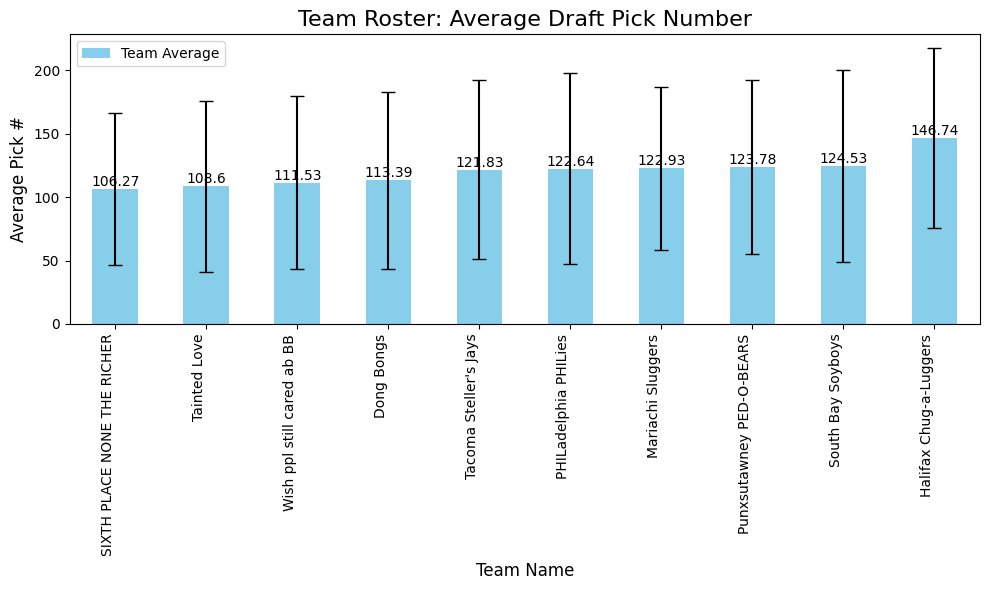

ANOVA Results:
F-statistic: 0.641, p-value: 0.762

Tukey HSD Pairwise Comparisons:
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                      group2           meandiff p-adj    lower    upper  reject
------------------------------------------------------------------------------------------------
                 Dong Bongs      Halifax Chug-a-Luggers  33.3522 0.8305  -31.9306 98.6349  False
                 Dong Bongs           Mariachi Sluggers   9.5391    1.0  -55.7436 74.8219  False
                 Dong Bongs        PHILadelphia PHILies   9.2478    1.0  -56.0349 74.5306  False
                 Dong Bongs    Punxsutawney PED-O-BEARS  10.3913    1.0  -54.8914  75.674  False
                 Dong Bongs SIXTH PLACE NONE THE RICHER  -7.1261    1.0  -72.4088 58.1567  False
                 Dong Bongs           South Bay Soyboys  11.1435 0.9999  -54.1393 76.4262  False
                 Dong Bongs       Tacoma Ste

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to load the CSV file, plot the graph, and perform pairwise comparisons
def plot_avg_pick_with_stats(csv_file):
    # Load the dataset
    df = pd.read_csv(csv_file)

    # Perform one-way ANOVA
    anova_results = stats.f_oneway(*[df[df['Team Name'] == team]['Avg. Pick'] for team in df['Team Name'].unique()])
    
    # Perform Tukey's HSD test for pairwise comparisons
    tukey = pairwise_tukeyhsd(endog=df['Avg. Pick'], groups=df['Team Name'], alpha=0.05)

    # Calculate the mean and standard deviation of 'Avg. Pick' per team
    team_avg_pick = df.groupby('Team Name')['Avg. Pick'].mean()
    team_std_pick = df.groupby('Team Name')['Avg. Pick'].std()

    # Sort teams by ascending average pick
    team_avg_pick = team_avg_pick.sort_values(ascending=True)
    team_std_pick = team_std_pick.loc[team_avg_pick.index]

    # Plot the bar graph with error bars (standard deviation)
    plt.figure(figsize=(10, 6))
    bars = team_avg_pick.plot(kind='bar', color='skyblue', yerr=team_std_pick, capsize=5, label='Team Average')

    # Adding the value on top of each bar
    for i, bar in enumerate(bars.patches):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    # Overlay individual points for each player in each team
   # for team in team_avg_pick.index:
        #team_data = df[df['Team Name'] == team]
       # x_vals = [team] * len(team_data)  # X-axis positions for individual points
       # plt.scatter(x_vals, team_data['Avg. Pick'], color='black', label='Individual Picks' if team == team_avg_pick.index[0] else "")

    # Adding labels and title
    plt.title('Team Roster: Average Draft Pick Number', fontsize=16)
    plt.xlabel('Team Name', fontsize=12)
    plt.ylabel('Average Pick #', fontsize=12)
    plt.xticks(rotation=90, ha='right')
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print ANOVA results
    print('ANOVA Results:')
    print(f'F-statistic: {anova_results.statistic:.3f}, p-value: {anova_results.pvalue:.3f}\n')

    # Print Tukey HSD results
    print('Tukey HSD Pairwise Comparisons:')
    print(tukey)

# Example usage with relative path
csv_file = '../Data/Yahoo-431.l.148152-Draft.csv'  # Ensure this path is correct relative to your working directory
plot_avg_pick_with_stats(csv_file)